# Analysis of Uber Taxis Demand and Supply Gap

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Plots Styling

In [2]:
sns.set_style('darkgrid')
custom_rc_params = {
    'font.size': 12,
    'grid.linestyle': '--',
    'lines.linewidth': 2
}
plt.rcParams.update(custom_rc_params)

## Load Data

In [3]:
df = pd.read_csv("C:/Users/neluw/Desktop/Data Science Projects/Uber Request Data.csv")

In [4]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


## Data Cleaning and Preparation

### Check Data Type for Request Timestamp and Drop Timestamp

In [5]:
df['Request timestamp'].dtype

df['Drop timestamp'].dtype

dtype('O')

### Convert Request Timestamp and Drop Timestamp from object type to datetime format

In [6]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])

In [7]:
df.head

<bound method NDFrame.head of       Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
...          ...          ...        ...                ...   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

       Request timestamp      Drop timestamp  
0    2016-11-07 11:51:00 2016-11-07 13:00:00  
1    2016-11-07 17:57:00 2016-11-07 18:47:00  
2    2016-12-07 09:17:00 2016-12-07 09:58:00  
3    2016-12-07 21:08:00 

In [8]:
df.shape

(6745, 6)

## Analysis of Dataset
### Problem Identification

#### Step 1: Check the count for frequency of requests

In [9]:
df.Status.value_counts(normalize=True)

Trip Completed       0.419718
No Cars Available    0.392884
Cancelled            0.187398
Name: Status, dtype: float64

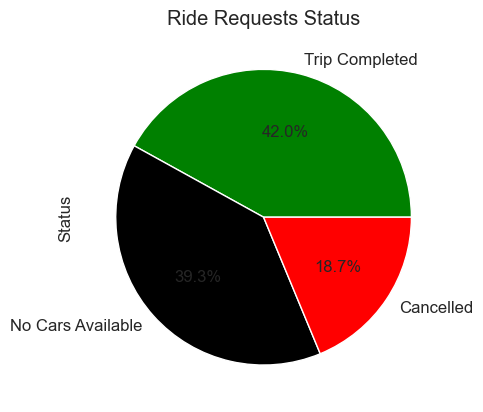

In [10]:
df.Status.value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'black', 'red'])
plt.title('Ride Requests Status')
plt.show()

#### Step 2: Analysis based on Availability

In [11]:
df[df['Status'] == 'No Cars Available']['Pickup point'].value_counts(normalize=True)

Airport    0.646415
City       0.353585
Name: Pickup point, dtype: float64

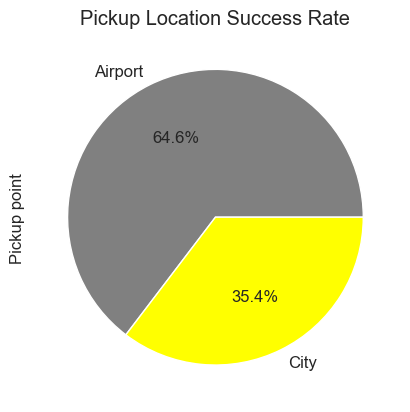

In [12]:
df[df['Status'] == 'No Cars Available']['Pickup point'].value_counts().plot.pie(autopct='%1.1f%%', colors=['grey', 'yellow'])
plt.title('Pickup Location Success Rate')
plt.show()

#### Step 3: Analysis based on Cancelled Requests

In [13]:
df[df['Status'] == 'Cancelled']['Pickup point'].value_counts(normalize=True)

City       0.843354
Airport    0.156646
Name: Pickup point, dtype: float64

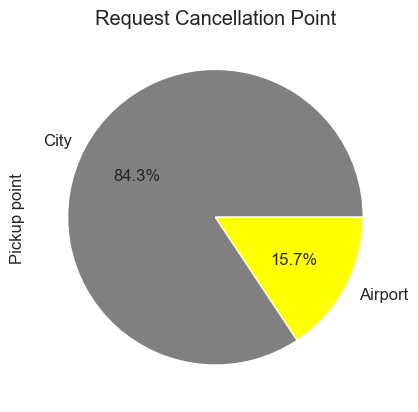

In [14]:
df[df['Status'] == 'Cancelled']['Pickup point'].value_counts().plot.pie(autopct='%1.1f%%', colors=['grey', 'yellow'])
plt.title('Request Cancellation Point')
plt.show()

#### Step 3.1: Frequency of Requests Originating from the Airport

In [15]:
df[df['Pickup point'] == 'Airport']['Status'].value_counts(normalize=True)

No Cars Available    0.529030
Trip Completed       0.409821
Cancelled            0.061149
Name: Status, dtype: float64

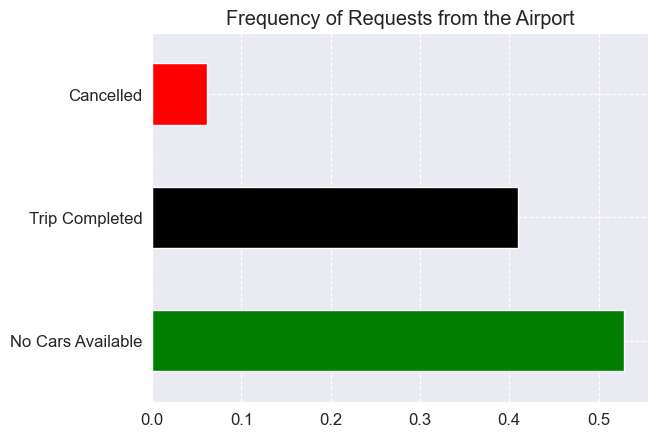

In [16]:
df[df['Pickup point'] == 'Airport']['Status'].value_counts(normalize=True).plot.barh(color=['green', 'black','red'])
plt.title('Frequency of Requests from the Airport')
plt.show()

#### Step 3.2: Frequency of Requests Originating from City Center

In [17]:
df[df['Pickup point'] == 'City']['Status'].value_counts(normalize=True)

Trip Completed       0.428857
Cancelled            0.303964
No Cars Available    0.267180
Name: Status, dtype: float64

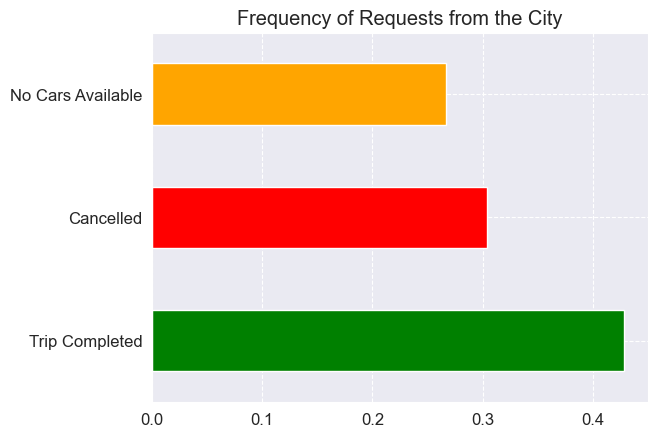

In [18]:
df[df['Pickup point'] == 'City']['Status'].value_counts(normalize=True).plot.barh(color=['green', 'red','orange'])
plt.title('Frequency of Requests from the City')
plt.show()

#### Step 4: Analysis Based on Pickup Time

##### Add a new column to the dataset to check pickup time in hours

In [19]:
df['hour'] = df['Request timestamp'].dt.hour

In [20]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


##### Categorize Pickup Times

In [21]:
df['period'] = pd.cut(df.hour, [0,4,8,12,16,19,21,25], labels = ['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Late Evening', 'Night'])

In [22]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,hour,period
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Late Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning


#### Step 4.1: Frequency of Ride Unavailabilty in Pickup Time Categories

In [23]:
df[df['Status'] == 'No Cars Available']['period'].value_counts(normalize=True)

Evening          0.322668
Late Evening     0.213955
Early Morning    0.124518
Late Night       0.093678
Morning          0.089823
Night            0.084426
Afternoon        0.070933
Name: period, dtype: float64

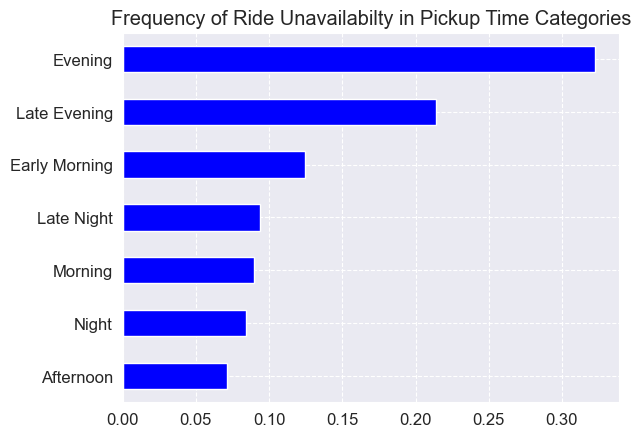

In [24]:
df[df['Status'] == 'No Cars Available']['period'].value_counts(normalize=True).sort_values(ascending=True).plot.barh(color='blue')
plt.title('Frequency of Ride Unavailabilty in Pickup Time Categories')
plt.show()

#### Step 4.2: Analysis based on Ride Unavailability in the Evening based on Pickup Locations

In [25]:
df[(df['period'] == 'Evening') & (df['Status'] == 'No Cars Available')]['Pickup point'].value_counts(normalize=True)

Airport    0.946237
City       0.053763
Name: Pickup point, dtype: float64

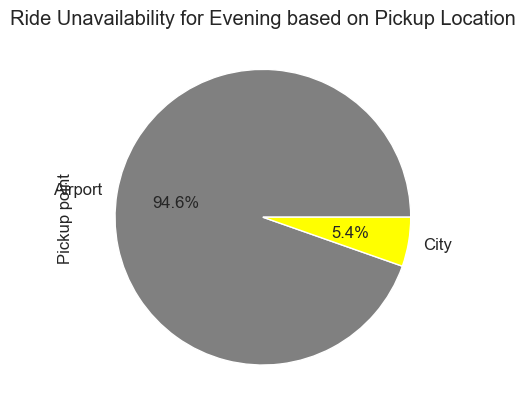

In [42]:
df[(df['period'] == 'Evening') & (df['Status'] == 'No Cars Available')]['Pickup point'].value_counts().plot.pie(autopct='%1.1f%%', colors=['grey', 'yellow'])
plt.title('Ride Unavailability for Evening based on Pickup Location')
plt.show()

#### Step 4.3 Frequency of Ride Cancellation Based on Pickup Time Categories

In [27]:
df[df['Status'] == 'Cancelled']['period'].value_counts(normalize=True)

Early Morning    0.529738
Morning          0.214909
Evening          0.065821
Late Evening     0.065821
Afternoon        0.057098
Late Night       0.049167
Night            0.017446
Name: period, dtype: float64

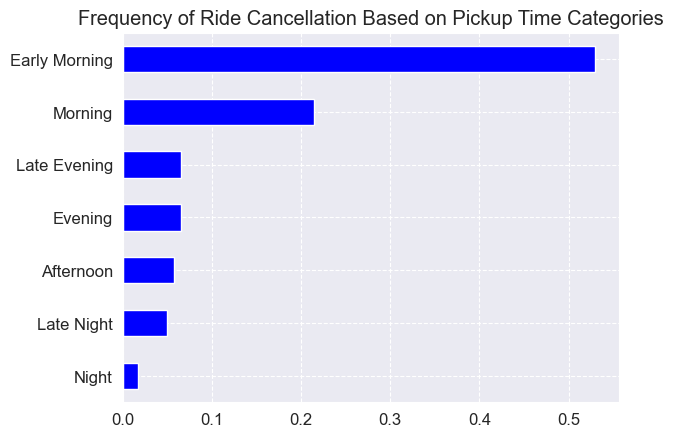

In [28]:
df[df['Status'] == 'Cancelled']['period'].value_counts(normalize=True).sort_values(ascending=True).plot.barh(color='Blue')
plt.title('Frequency of Ride Cancellation Based on Pickup Time Categories')
plt.show()

#### Step 4.4: Analysis based on Ride Cancellation in the Early Morning based on Pickup Locations

In [29]:
df[(df['period'] == 'Early Morning') & (df['Status'] == 'Cancelled')]['Pickup point'].value_counts(normalize=True)

City       0.977545
Airport    0.022455
Name: Pickup point, dtype: float64

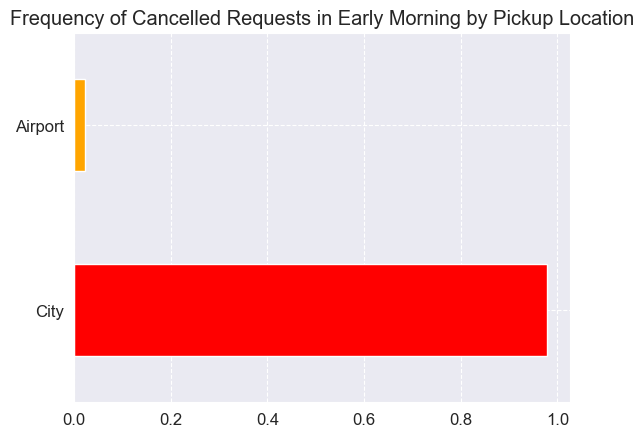

In [30]:
df[(df['period'] == 'Early Morning') & (df['Status'] == 'Cancelled')]['Pickup point'].value_counts(normalize=True).plot.barh(color=['red', 'orange'])
plt.title('Frequency of Cancelled Requests in Early Morning by Pickup Location')
plt.show()

#### Step 5: Demand and Supply Analysis

##### Add new columns for demand, supply and gap frequencies

In [31]:
df['demand'] = 1
df['supply'] = df.Status.apply(lambda x: 1 if x == 'Trip Completed' else 0)
df['gap'] = df['demand'] - df['supply']

In [32]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,hour,period,demand,supply,gap
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Morning,1,1,0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,1,1,0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning,1,1,0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Late Evening,1,1,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning,1,1,0


#### Step 5.1: Demand and Supply Analysis Based on Time Categories

In [33]:
# Creating a Pivot Table to Analyze Demand and Supply by Time Categories

demand_supply_time = pd.pivot_table(data=df, index = 'period', values=['demand', 'supply', 'gap'], aggfunc=np.sum)

In [34]:
demand_supply_time

,demand,gap,supply
period,,,
Late Night,479,305,174
Early Morning,1672,991,681
Morning,1029,504,525
Afternoon,626,256,370
Evening,1401,920,481
Late Evening,941,638,303
Night,498,241,257


The provided data represents the demand, gap, and supply statistics for different time periods:

Late Night: Demand of 479, Gap of 305, Supply of 174.
Early Morning: Demand of 1672, Gap of 991, Supply of 681.
Morning: Demand of 1029, Gap of 504, Supply of 525.
Afternoon: Demand of 626, Gap of 256, Supply of 370.
Evening: Demand of 1401, Gap of 920, Supply of 481.
Late Evening: Demand of 941, Gap of 638, Supply of 303.
Night: Demand of 498, Gap of 241, Supply of 257.
These figures provide insights into the demand for car services during various time periods, the unmet demand (gap), and the available supply. Analyzing this data can help identify when and where there might be challenges in matching demand with supply, which can be crucial for optimizing service provision.

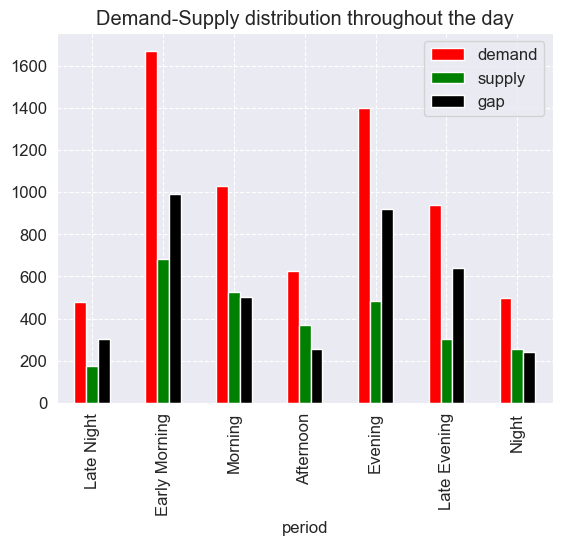

In [35]:
demand_supply_time[['demand','supply','gap']].plot.bar(color=['red', 'green','black'])
plt.title('Demand-Supply distribution throughout the day')
plt.show()

#### Step 5.2: Demand and Supply Analysis Based on Early Morning Time Category

In [36]:
# Creating a Pivot Table to Analyze Distribution of Ride Requests in Early Morning

demand_supply_Early_Morning = pd.pivot_table(data = df[df['period'] == 'Early Morning'], index = 'Pickup point', values = ['demand', 'supply', 'gap'], aggfunc=np.sum)

In [37]:
demand_supply_Early_Morning

,demand,gap,supply
Pickup point,,,
Airport,337,29,308
City,1335,962,373


These figures indicate the demand for car services at both pickup points, the unmet demand (gap), and the available supply. In this case, it's evident that there's a substantial gap in meeting the demand within the city, leading to a higher number of unmet requests compared to the airport. This data is valuable for identifying and addressing service inefficiencies and optimizing supply allocation.

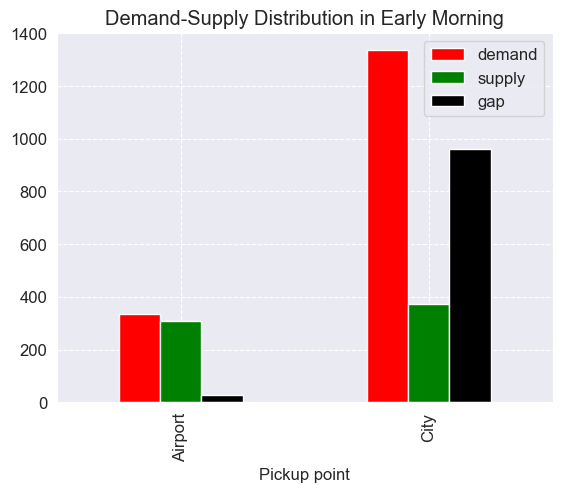

In [38]:
demand_supply_Early_Morning[['demand','supply','gap']].plot.bar(color=['red', 'green','black'])
plt.title('Demand-Supply Distribution in Early Morning')
plt.show()

#### Step 5.3: Demand and Supply Analysis Based on Evening Time Category

In [39]:
# Creating a Pivot Table to Analyze Distribution of Ride Requests in Early Morning

demand_supply_Evening = pd.pivot_table(data = df[df['period'] == 'Evening'], index = 'Pickup point', values = ['demand', 'supply', 'gap'])

In [40]:
demand_supply_Evening

,demand,gap,supply
Pickup point,,,
Airport,1,0.779425,0.220575
City,1,0.245342,0.754658


These figures indicate the demand for car services at both pickup points, the unmet demand (gap), and the available supply. In this scenario, there is a significant gap in meeting the demand at the airport, with a much higher number of unmet requests compared to the city. This data is valuable for identifying and addressing service inefficiencies and optimizing supply allocation, especially at the airport pickup point.

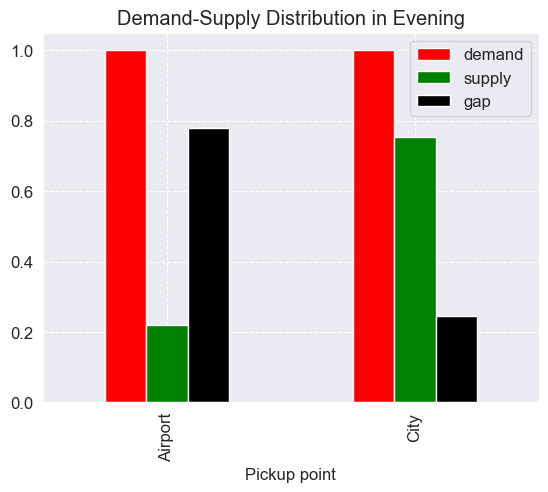

In [41]:
demand_supply_Evening[['demand','supply','gap']].plot.bar(color=['red', 'green','black'])
plt.title('Demand-Supply Distribution in Evening')
plt.show()